In [40]:
import sys
sys.path.append('../')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
from python.utility import *
import python.edge as edge
from time import time
from sklearn.decomposition import PCA
import pylab as pl

In [41]:
images = np.array(folderToImages("../data/interim/s7_spim3/"))
#images = np.array(folderToImages("../data/Data Annotation/Predicted/"))

In [47]:
n_samples, h, w = images.shape
np.random.seed(42)

X = []
for image in images:
    X.append(image.flatten())  
X = np.matrix(X)
n_features = X.shape[1]

In [48]:
# introspect the images arrays to find the shapes (for plotting)
n_components = 50

print ("Extracting the top %d eigenfaces from %d faces" % (n_components, X.shape[0]))
t0 = time()
pca = PCA(svd_solver='randomized', n_components=n_components, whiten=True).fit(X)
print ("done in %0.3fs" % (time() - t0))

Extracting the top 50 eigenfaces from 500 faces
done in 19.689s


In [49]:
print ("Explained Variance Ratio:", pca.explained_variance_ratio_[0], ", ", pca.explained_variance_ratio_[1])
print(pca.components_.shape)
eigenvec = pca.components_.reshape((n_components, h, w))
print ("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
images_pca = pca.transform(X)
print ("done in %0.3fs" % (time() - t0))

Explained Variance Ratio: 0.0502512584779 ,  0.0319320948463
(50, 339872)
Projecting the input data on the eigenfaces orthonormal basis
done in 2.352s


In [50]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


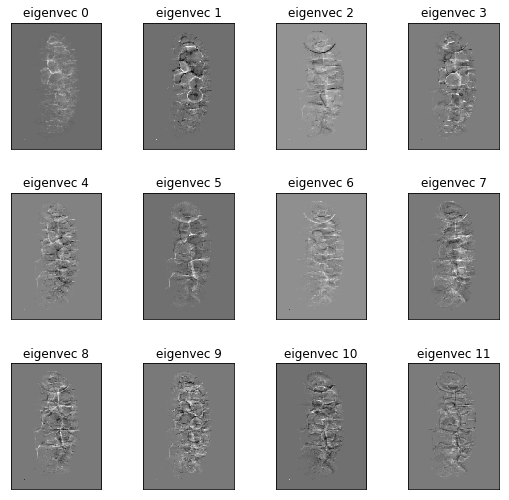

In [51]:
eigenvec_titles = ["eigenvec %d" % i for i in range(eigenvec.shape[0])]
plot_gallery(eigenvec, eigenvec_titles, h, w)

pl.show()